In [1]:
# Адаптируем размер тетрадки
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

<a id='31-bullet'></a>

<b> Название проекта: </b>
    
Стратегия взаимодействия с клиентами на основе аналитических данных сети фитнес-центров «Культурист-датасаентист»

<b> Цель проекта: </b>

Подготовить план действий по удержанию клиентов.


    
В данном исследовании представлены данные клиента за предыдущий до проверки факта оттока месяц и информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента.
    

<b> Данное исследование разделим на несколько частей:<b/>

##### Часть 1. Изучение общей информации:
* [1. Изучение файлов с данными, получение общей информации, загрузка библиотек.](#1-bullet)

##### Часть 2. Подготка данных и (EDA):
* [1. Посмотрите на датасет: есть ли в нем отсутствующие признаки, изучите средние значения и стандартные отклонения (пригодится метод describe());](#2.1-bullet)
* [2. Посмотрите на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался (воспользуйтесь методом groupby());](#2.2-bullet)
* [3. Постройте столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток);](#2.3-bullet)
* [4. Постройте матрицу корреляций и отобразите её.](#2.4-bullet)


##### Часть 3. Постройте модель прогнозирования оттока клиентов:
* [1. Разбейте данные на обучающую и валидационную выборку функцией train_test_split().](#3.1-bullet)
* [2. Обучите модель на train-выборке двумя способами:](#3.2-bullet)
    * [3. Логистической регрессией,](#3.3-bullet)
    * [4. Случайным лесом.](#3.4-bullet)
* [5. Оцените метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравните по ним модели. Какая модель показала себя лучше на основании метрик?](#3.5-bullet)


##### Часть 4. Сделайте кластеризацию клиентов:
* [1. Стандартизируйте данные.](#4.1-bullet)
* [2. Постройте матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуйте дендрограмму. Внимание: отрисовка дендрограммы может занять время! На основании полученного графика предположите, какое количество кластеров можно выделить.](#4.2-bullet)
* [3. Обучите модель кластеризации на основании алгоритма K-Means и спрогнозируйте кластеры клиентов. Договоримся за число кластеров принять n=5, чтобы ваши результаты можно было сравнивать с результатами остальных студентов. Однако, конечно, в жизни никто не скажет вам правильный ответ, и решение остаётся за вами (на основании изучения графика из предыдущего пункта).](#4.3-bullet)
* [4. Посмотрите на средние значения признаков для кластеров. Можно ли сразу что-то заметить?](#4.4-bullet)
* [5. Постройте распределения признаков для кластеров. Можно ли что-то заметить по ним?](#4.5-bullet)
* [6. Для каждого полученного кластера посчитайте долю оттока (методом groupby()). Отличаются ли они по доле оттока? Какие кластеры склонны к оттоку, а какие — надёжны?](#4.6-bullet)
  
    
##### Часть 5. Общий вывод:
* [1. Общий вывод и рекомендации.](#5-bullet)  
   

    

<b> Описание проекта:</b>
    
Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет. Ваша задача — провести анализ и подготовить план действий по удержанию клиентов.
    
<b> Описание данных проекта:</b>

* Данные клиента за предыдущий до проверки факта оттока месяц:
    * 'gender' — пол;
    * 'Near_Location' — проживание или работа в районе, где находится фитнес-центр;
    * 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
    * 'Promo_friends' — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
    * 'Phone' — наличие контактного телефона;
    * 'Age' — возраст;
    * 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).
    
* Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
    * 'Contract_period' — длительность текущего действующего абонемента (месяц, 6 месяцев, год);
    * 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);
    * 'Group_visits' — факт посещения групповых занятий;
    * 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
    * 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;
    * 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.
    * 'Churn' — факт оттока в текущем месяце.

<a id= '1-bullet'></a>
# Изучение общей информации:

In [2]:
# импортируем библиотеки
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import itertools

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso 
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.cluster import KMeans

from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage 



In [3]:
# прочитаем из csv-файла данные
import os

pth1 = '/datasets/gym_churn.csv'
pth2 = 'gym_churn.csv'

if os.path.exists(pth1):
    gym_churn = pd.read_csv(pth1)
elif os.path.exists(pth2):
    gym_churn = pd.read_csv(pth2)
else:
    print('Something is wrong')



In [4]:
# посмотрим на данные
gym_churn.info()
gym_churn.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [5]:
# Проверка на полные дубликаты:
print(gym_churn.duplicated().sum())

0


In [6]:
# Проверка на пропуски:
print(gym_churn.isna().sum())

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64


<b> Вывод:
    В датасете 14 столбцов содержащие 4000 записей. Данные чистые, без пропусков и дубликатов. Все данные числовые и удобные для использования. Для удобства, стоит привести все названия к нижнему регистру.

<a id= '2.1-bullet'></a>
# Подготка данных и (EDA):

In [7]:
# приведем названия столбцов к нижнему регистру
gym_churn.columns = gym_churn.columns.str.lower()

gym_churn.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


<a id= '2.1-bullet'></a>
## Посмотрите на датасет: есть ли в нем отсутствующие признаки, изучите средние значения и стандартные отклонения (пригодится метод describe());

In [8]:
gym_churn.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


<b> Вывод:</b>
Из таблицы можно сделать предворительные предположения:

    * Большая часть из них проживает или работает в районе, где находится фитнес-центр.
    * Очень мало людей пользуется акцией «приведи друга»
    * Средний возраст 29 лет.
    * Меньше половины ходять на групповые занялия.
    * Средняя посещаемость ~2 раза в неделю.

<a id= '2.2-bullet'></a>
## Посмотрите на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался (воспользуйтесь методом groupby());

In [9]:
churn_query = gym_churn.groupby('churn').mean().T
churn_query

churn,0,1
gender,0.510037,0.510839
near_location,0.873086,0.768143
partner,0.534195,0.355325
promo_friends,0.353522,0.183789
phone,0.903709,0.902922
contract_period,5.747193,1.728558
group_visits,0.464103,0.268615
age,29.976523,26.989632
avg_additional_charges_total,158.445715,115.082899
month_to_end_contract,5.283089,1.662582


<a id= '2.3-bullet'></a>
## Постройте столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток);

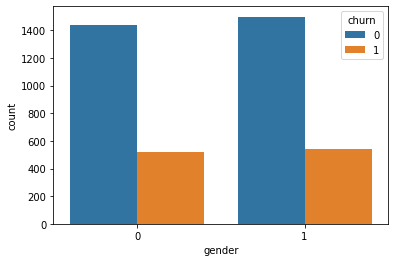

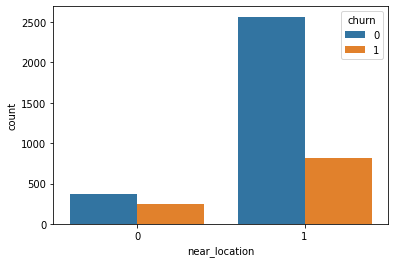

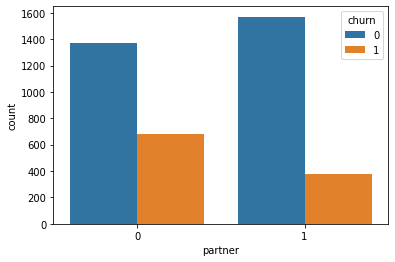

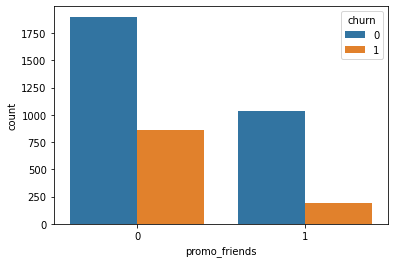

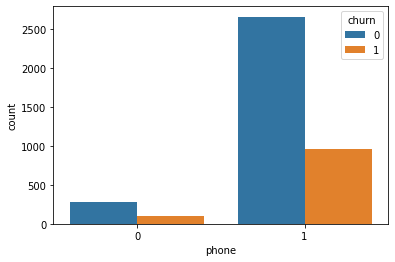

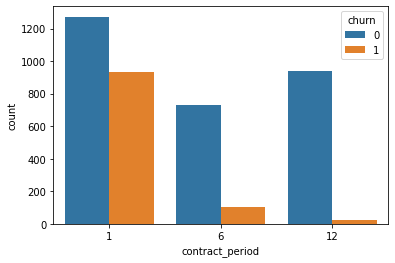

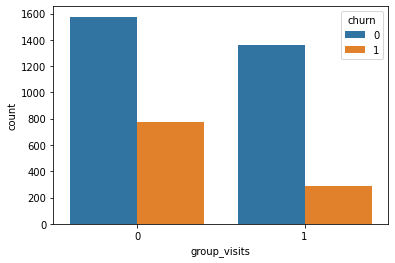

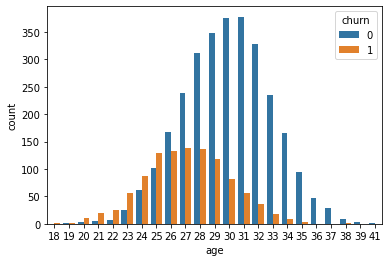

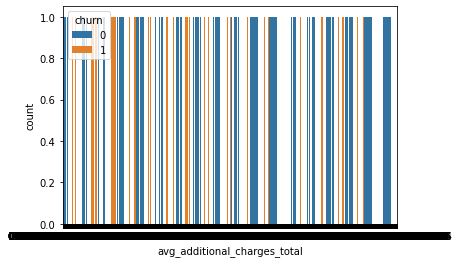

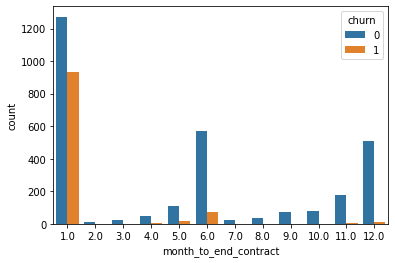

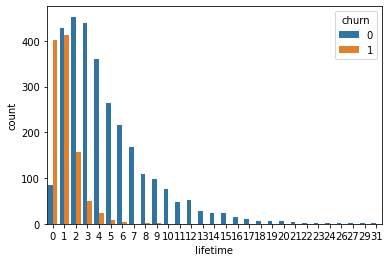

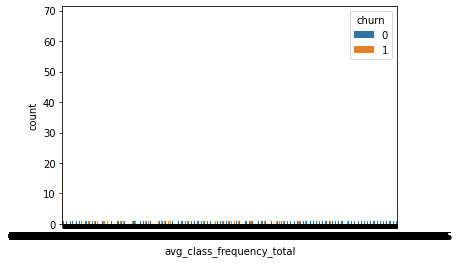

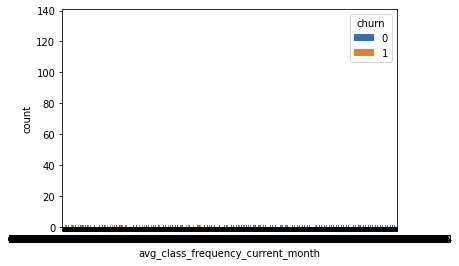

In [10]:

for col in gym_churn.drop('churn', axis = 1).columns:
    sns.countplot(data =gym_churn,  x = gym_churn[col], hue=gym_churn['churn'])
    plt.show()

<a id= '2.4-bullet'></a>
## Постройте матрицу корреляций и отобразите её.

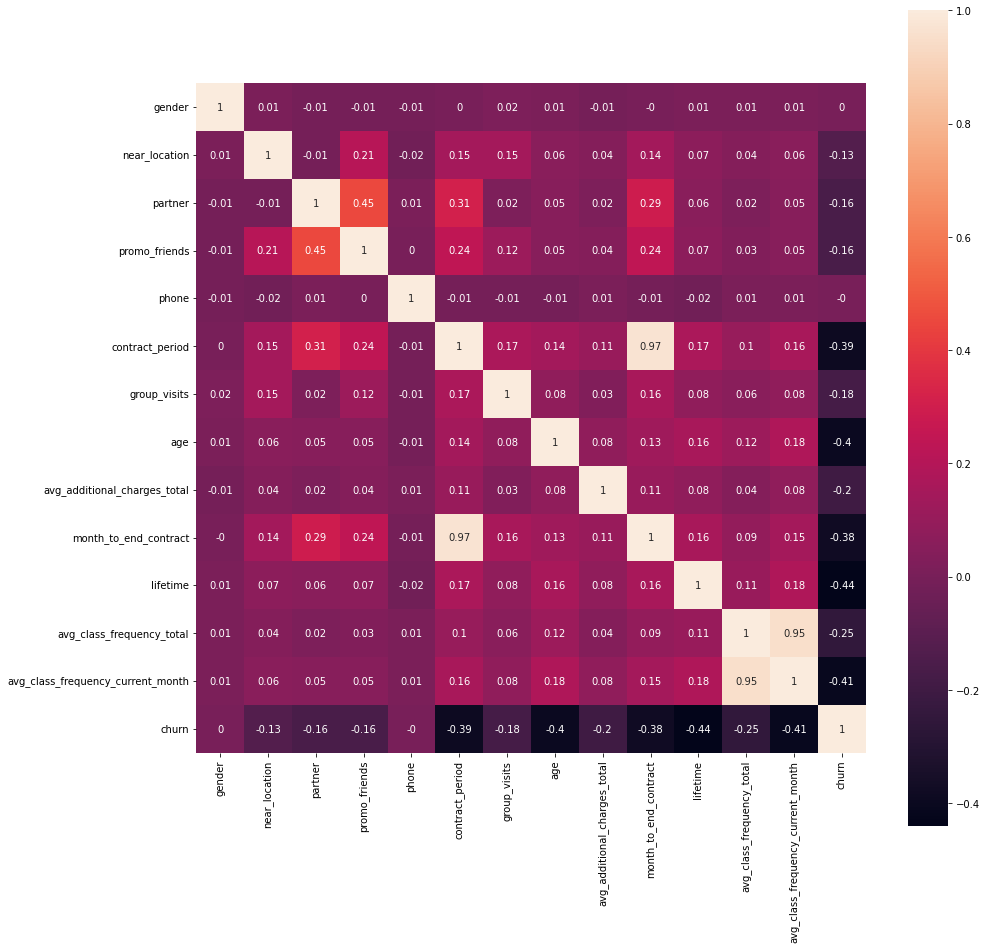

In [11]:
gym_corr = round(gym_churn.corr(),2)
plt.figure(figsize=(15,15))
sns.heatmap(gym_corr, annot = True, square=True,)
plt.show()

<b> Вывод:
    
    Чаще всего люди уходять в первый месяц или когда срок до окончания текущего действующего абонемента 1 месяц. Также выше вероятность ухода, если человек не посещает группавые занятия, не приводит друзей и не является сотрудником компании-партнёра клуба.
    В целом мы наюлюдаем очень низкую корреляцию между признаками кроме в близких по расчетам как 'Avg_class_frequency_current_month' - 'Avg_class_frequency_total' и 'Month_to_end_contract' - 'Contract_period'. 

<a id= '2.1-bullet'></a>
# Постройте модель прогнозирования оттока клиентов:

<a id= '2.1-bullet'></a>
## Разбейте данные на обучающую и валидационную выборку функцией train_test_split().

In [12]:
#разделим наши данные на признаки (матрица X) и целевую переменную (y)
X = gym_churn.drop('churn', axis = 1)
y = gym_churn['churn']

#разделяем модель на обучающую и валидационную выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

<a id= '3.2-bullet'></a>
## Обучите модель на train-выборке двумя способами:

In [13]:
# стандартизируем данные
sc = StandardScaler()
x_sc = sc.fit_transform(gym_churn)

<a id= '3.3-bullet'></a>
### Логистической регрессией,

In [14]:
model_1 = LogisticRegression(solver='liblinear', random_state=0)
model_1.fit(X_train, y_train)
pred_1 = model_1.predict(X_test)
prob_1 = model_1.predict_proba(X_test)[:,1]
#print('Предсказание:', pred_1)
#print('Возможность принадлежности объекта к первому или второму классу:', prob_1)

<a id= '3.4-bullet'></a>
### Случайным лесом.

In [15]:
model_2 = RandomForestClassifier(n_estimators = 100, random_state = 0)
model_2.fit(X_train, y_train)
pred_2 = model_2.predict(X_test)
prob_2 = model_2.predict_proba(X_test)[:,1]

<a id= '3.5-bullet'></a>
## Оцените метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравните по ним модели. Какая модель показала себя лучше на основании метрик?

In [16]:
# определим функцию, которая будет выводить наши метрики
def print_all_metrics(y_test, y_pred, y_prob, title='Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_test, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_test, y_pred)))

In [17]:
# выведем все метрики
print_all_metrics(y_test, pred_1, prob_1, title='Метрики логистической регрессии')
print_all_metrics(y_test, pred_2, prob_2, title='Метрики случайного леса')

Метрики логистической регрессии
	Accuracy: 0.93
	Precision: 0.86
	Recall: 0.83
Метрики случайного леса
	Accuracy: 0.92
	Precision: 0.84
	Recall: 0.82


<b>Вывод:
    Исходя из метрик, модель логической регрессии показывает себя немного лучше случайного леса.

<a id= '4.1-bullet'></a>
# Сделайте кластеризацию клиентов:

<a id= '4.3-bullet'></a>
## Постройте матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуйте дендрограмму. Внимание: отрисовка дендрограммы может занять время! На основании полученного графика предположите, какое количество кластеров можно выделить.

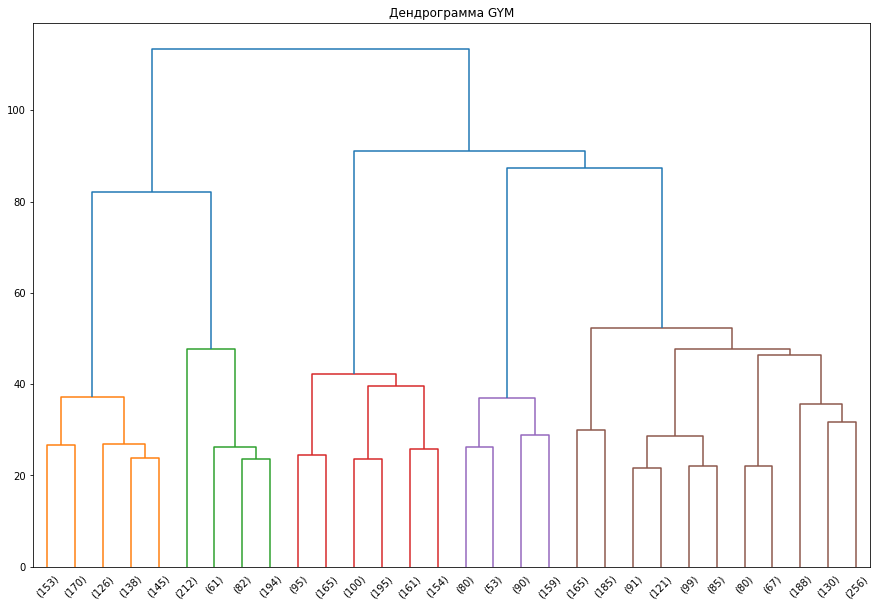

In [21]:
# Сохраняем таблицу связок между объектами в переменную linked и рисуем дендрограмму:
linked = linkage(x_sc, method = 'ward') 
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top', truncate_mode='lastp')
plt.title('Дендрограмма GYM')
plt.show() 

<b>Вывод:
    Судя по дендрограмме, датасет мошно поделить на 5 кластеров. 

<a id= '4.4-bullet'></a>
## Обучите модель кластеризации на основании алгоритма K-Means и спрогнозируйте кластеры клиентов. Договоримся за число кластеров принять n=5, чтобы ваши результаты можно было сравнивать с результатами остальных студентов. Однако, конечно, в жизни никто не скажет вам правильный ответ, и решение остаётся за вами (на основании изучения графика из предыдущего пункта).

In [19]:
# задаём число кластеров, равное 5, и фиксируем значение random_state для воспроизводимости результата
km = KMeans(n_clusters=5, random_state=0)

# применяем алгоритм к данным и формируем вектор кластеров
labels = km.fit_predict(x_sc) 

# сохраняем метки кластера в поле нашего датасета
gym_churn['cluster_km'] = labels

# выводим статистику по средним значениям наших признаков по кластеру
print(gym_churn.groupby('cluster_km').mean())


              gender  near_location   partner  promo_friends     phone  \
cluster_km                                                               
0           0.503676       0.000000  0.459559       0.075368  0.917279   
1           0.492829       0.936115  0.764016       0.534550  0.919166   
2           0.507917       1.000000  0.323995       0.213155  0.903776   
3           0.521186       0.996610  0.282203       0.208475  0.904237   
4           0.518895       0.968023  0.744186       0.526163  0.873547   

            contract_period  group_visits        age  \
cluster_km                                             
0                  2.069853      0.211397  28.522059   
1                 10.447197      0.516297  29.962190   
2                  1.546894      0.287454  26.926918   
3                  1.882203      0.452542  30.237288   
4                  8.859012      0.534884  29.728198   

            avg_additional_charges_total  month_to_end_contract  lifetime  \
cluster_km 

<a id= '4.5-bullet'></a>
## Посмотрите на средние значения признаков для кластеров. Можно ли сразу что-то заметить?

In [20]:
# определим функцию отрисовки графиков попарных признаков для кластеров
def show_clusters_on_plot(df, x_name, y_name, cluster_name):
    plt.figure(figsize=(5, 5))
    sns.scatterplot(
        df[x_name], df[y_name], hue=df[cluster_name], palette='Paired'
    )
    plt.title('{} vs {}'.format(x_name, y_name))
    plt.show()

# отрисуем графики для попарных сочетаний признаков с разметкой по кластерам
col_pairs = list(itertools.combinations(gym_churn.drop('churn', axis=1).columns, 2))
for pair in col_pairs:
    show_clusters_on_plot(gym_churn, pair[0], pair[1], 'churn')

TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 2 keyword-only arguments) were given

<Figure size 360x360 with 0 Axes>

Из статистики по средним значениям наших признаков по кластеру можно заметить:

    * Большее количество оттока наблюдается во 2 кластере и среднее в 0. Меньше всего в 3 и 1.
    * В 0 кластере никто не проживает или работает в районе, где находится фитнес-центр. Во 2 кластере все местные.
    * У кластеров 1 и 4 все имеют срок до окончания текущего действующего абонемента больше 8 при том, что остальные не больше 2


<a id= '4.6-bullet'></a>
## Для каждого полученного кластера посчитайте долю оттока (методом groupby()). Отличаются ли они по доле оттока? Какие кластеры склонны к оттоку, а какие — надёжны?

In [22]:
gym_churn.groupby('cluster_km')['churn'].mean()

cluster_km
0    0.450368
1    0.007823
2    0.961023
3    0.003390
4    0.024709
Name: churn, dtype: float64

<b>
Больше всего оттока в кластерах 2, 0 и 4.
Самые надежные кластеры 3 и 1

<a id= '5-bullet'></a>
# Общий вывод:

<b>
1 - Чаще всего люди уходять в первый месяц или когда срок до окончания текущего действующего абонемента 1 месяц.
    
   * Возможно человек потерял интерес, можно в это время предложить 1 бесплатную консультацию с тренером или 1 бесплатное пользование какой-нибудь платной опцией.

<b>
2 - Выше вероятность ухода если человек:
    
* Не посещает группавые занятия
    * Возможно не следит за расписанием или просто не знает когда занятия, можно присылать напоминания с актуальным графиком групповых занятии.
* Не приводит друзей 
    * Возможно нет мотивации. Можно разработать систему поощрении за друга + напоминать о такой опции.
* Не является сотрудником компании-партнёра клуба.
    * Возможно компании не знают о такой опции или не видят в ней выгоды для себя и своих сотрудниках. Стоит развивать сеть партнеров. Можно обратится с предложением и взаимовыгодными условиями к компаниям по близости.

<b>
3- Почти все люди со второво кластера ушли в текущем месяце.
    
   * Стоит провести опрос и выяснить, что послужило причиной.
   * Также стоит включить в опрос кластеры 0 и 4.

<b>
4- Повысить удержание поможет мотивация, как со стороны тренеров так и со стороны самих посетителей. Стоит создать отдельные группы в месенджерах или раздел на сайте где посетители смогут общаться, делится достижениями, планировать общие тренировки и мотивировать друг друга. Сильно поможет собственное приложение где помимо возможности продавать дополнительные опции как личный план тренировок, доступ к полной енциклопедии знании о тренировках и диетах для достижения разных результатов; можно геймифицировать процесс спорта и ввести свою валюту внутри приложения которую можно потратить на платные опции. Это поможет сильно увеличить привязанность к продукту. Плюс есть возможность прямой передачи информации через пуш уведомления.

# [Вернуться к началу.](#31-bullet)